## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Let's check the correlation between inputs and output.

In [5]:
corr_df = df.corr()
df_corr = pd.DataFrame(corr_df['charges'])
df_corr

,charges
age,0.299008
bmi,0.198341
children,0.067998
charges,1.000000


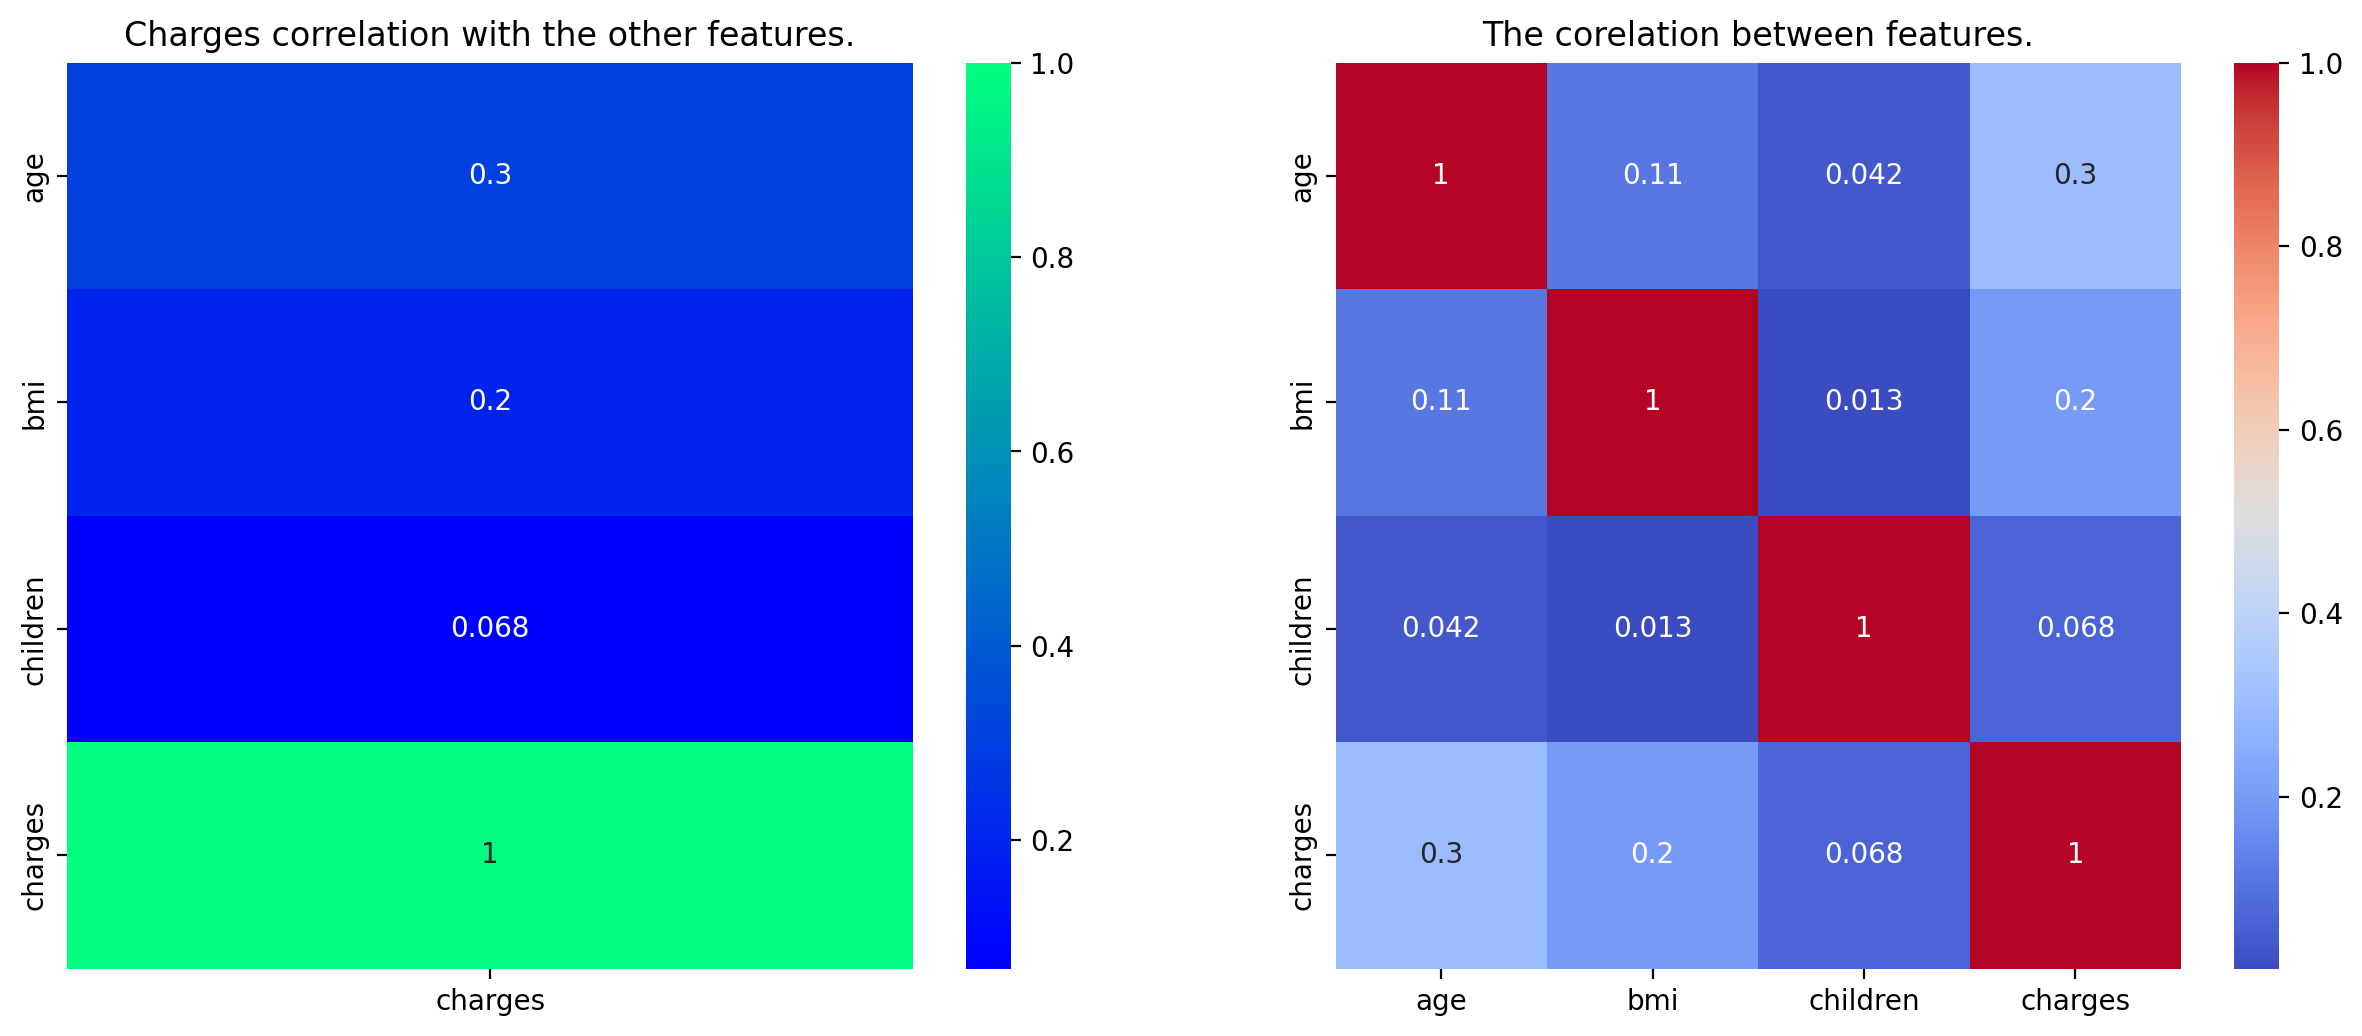

In [6]:
plt.figure(figsize = (15,6), dpi = 200)
plt.subplot(121)
sns.heatmap(df_corr,cmap = 'winter',annot = True)
plt.title('Charges correlation with the other features.')

plt.subplot(122)
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title('The corelation between features.')
plt.show()

<Figure size 3000x1200 with 0 Axes>

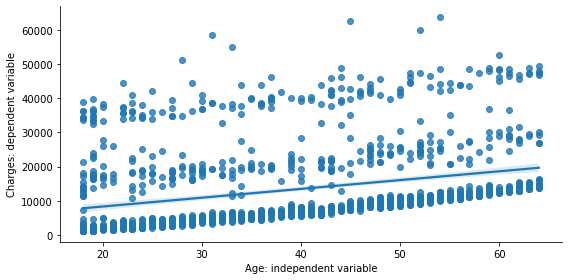

In [7]:
plt.figure(figsize = (15,6), dpi = 200)
sns.lmplot(x = 'age', y= 'charges', data = df, aspect = 2, height = 4)
plt.xlabel('Age: independent variable')
plt.ylabel('Charges: dependent variable')
plt.show()


<Figure size 3000x1200 with 0 Axes>

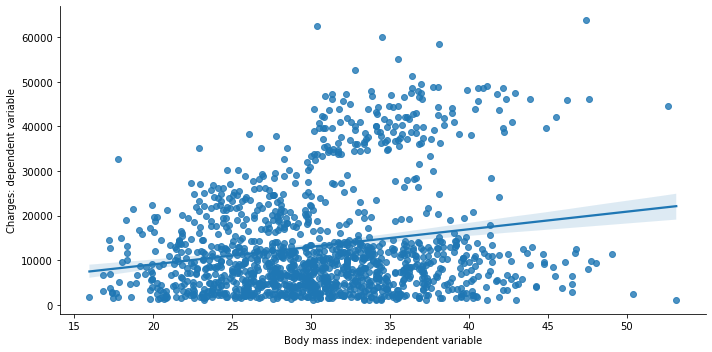

In [8]:
plt.figure(figsize = (15,6), dpi = 200)
sns.lmplot(x = 'bmi', y = 'charges', data = df, aspect = 2, height = 5)
plt.xlabel('Body mass index: independent variable')
plt.ylabel('Charges: dependent variable')
plt.show()

## When data have a wide range of values or are skewed, the impact of large or extreme values can dominate the regression model. Logarithmic scaling can help equalize the impact of extreme values, compressing the data and making the relationships between variables more balanced.

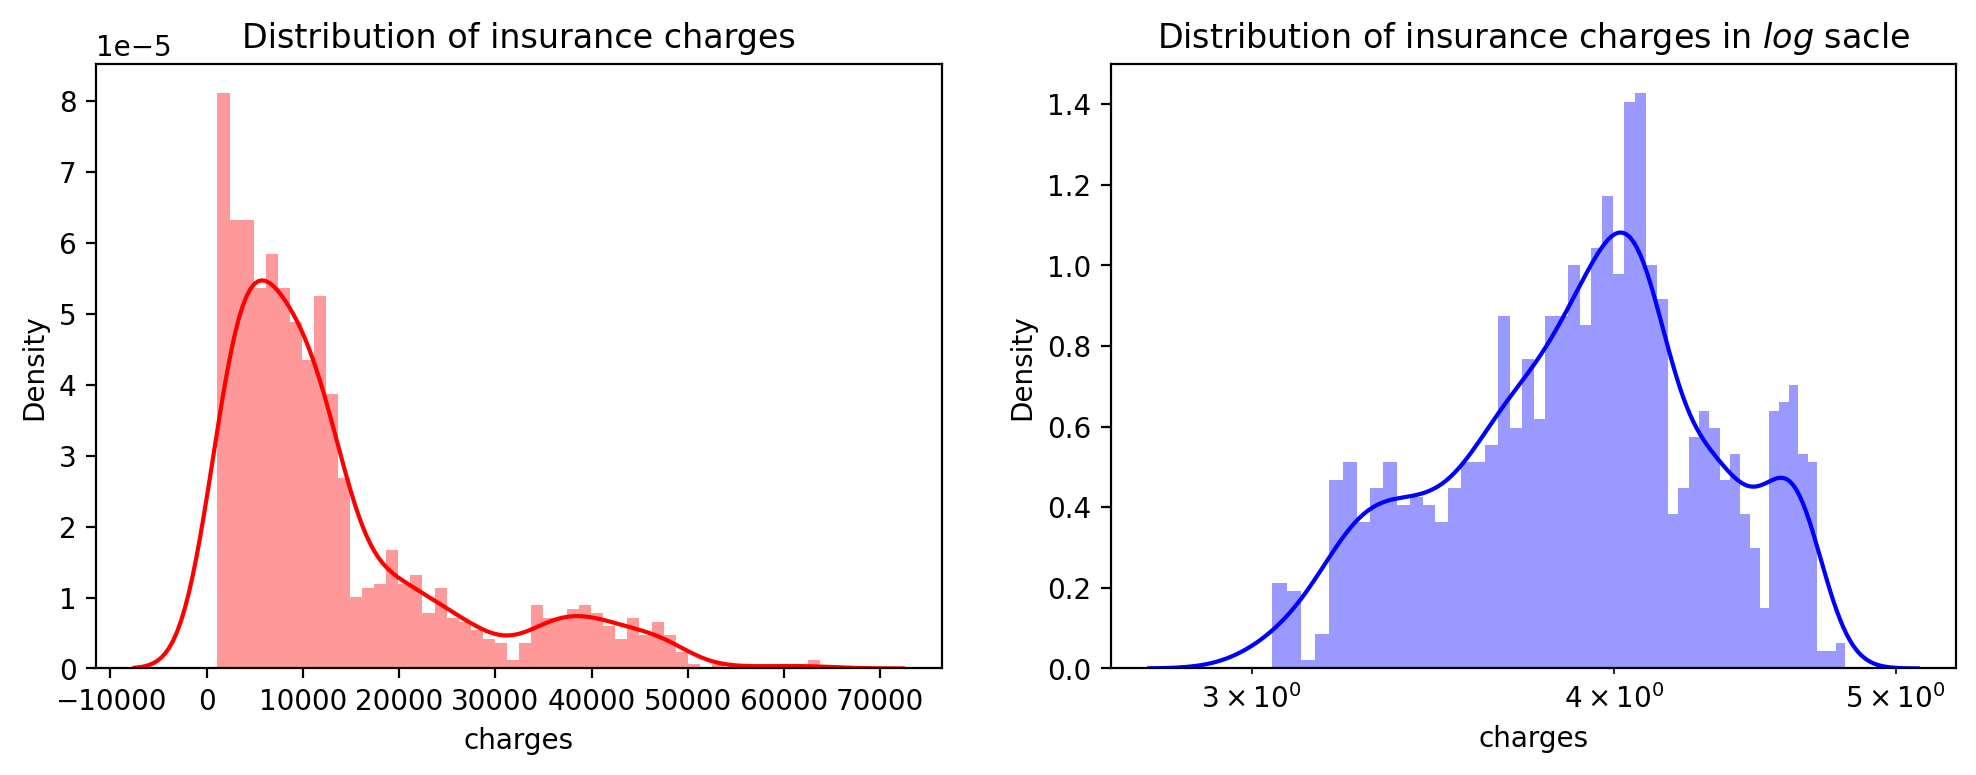

In [9]:
f = plt.figure(figsize = (12,4),dpi = 200)

ax = f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), bins = 50, color = 'blue', ax = ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()

## Let's plot the data for analysis.

## From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. 

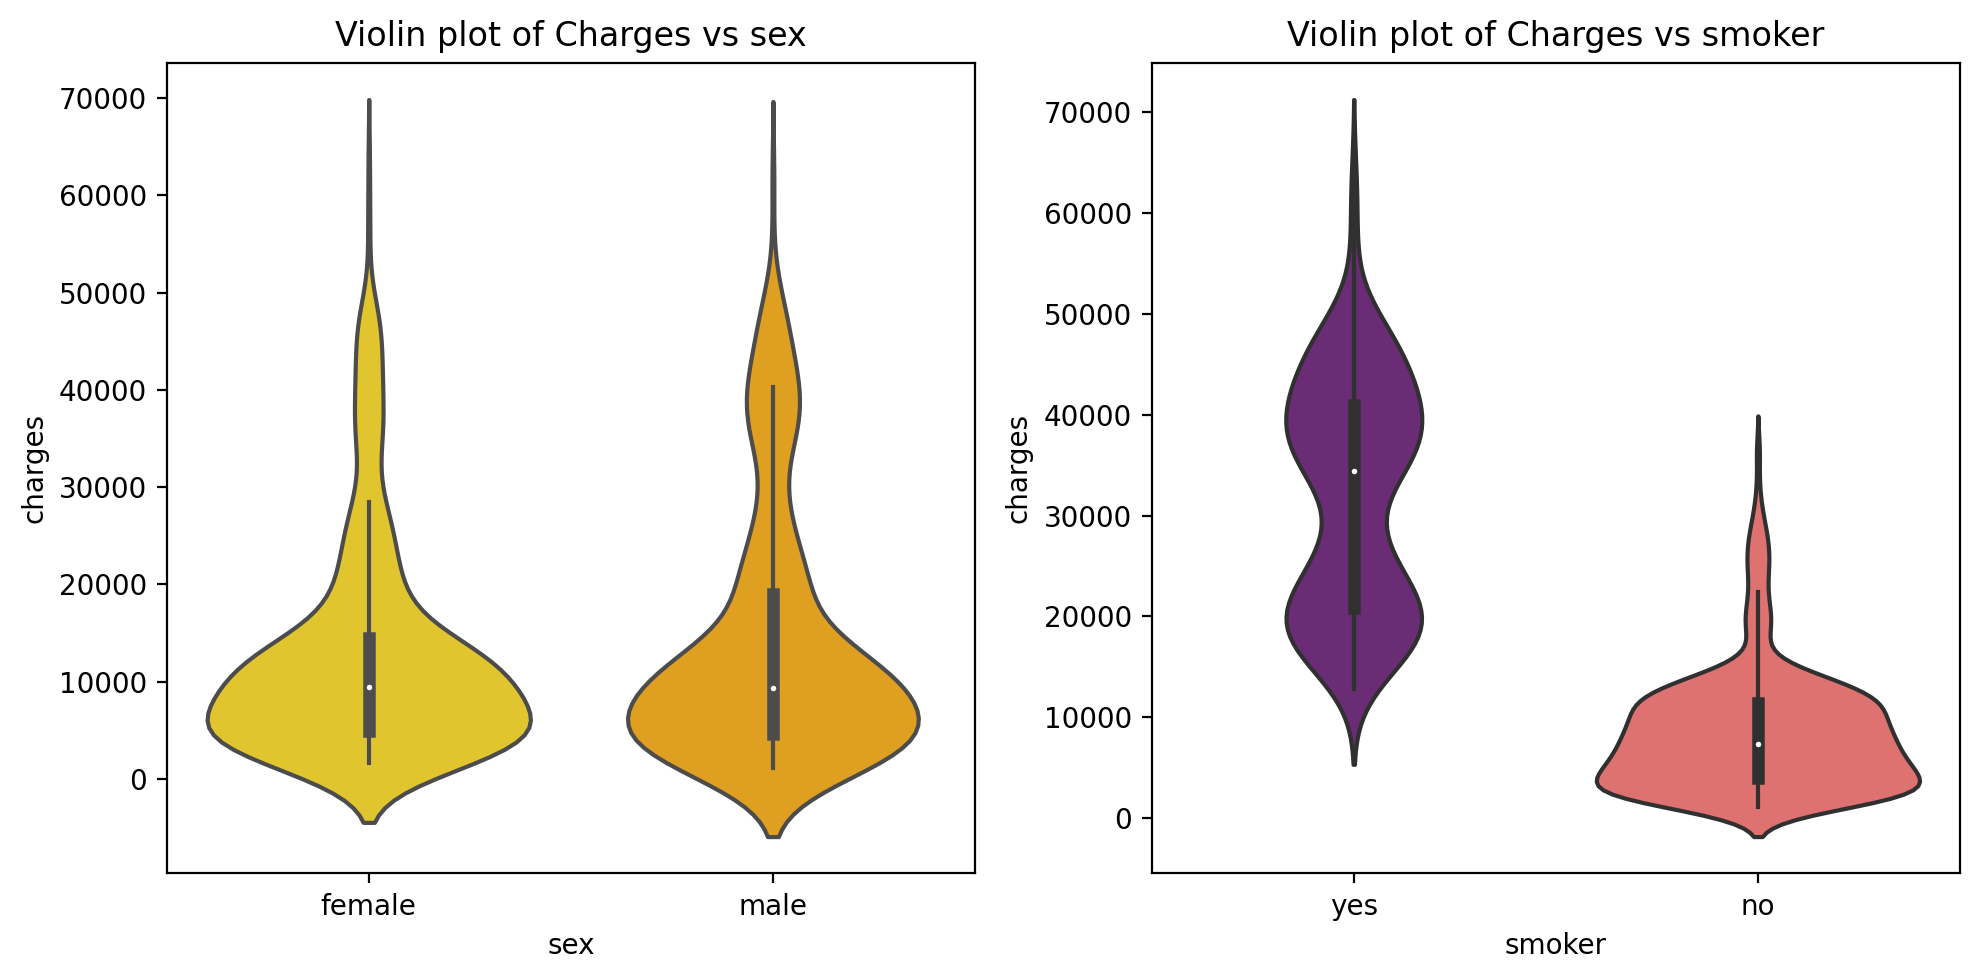

In [10]:
f = plt.figure(figsize = (10,5),dpi = 200)

ax = f.add_subplot(121)
sns.violinplot(x = 'sex', y = 'charges', data = df, palette = 'Wistia', ax = ax )
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges', data = df, palette = 'magma', ax = ax)
ax.set_title('Violin plot of Charges vs smoker')

plt.tight_layout()
plt.show()

## The code for check outliers in dependent variable

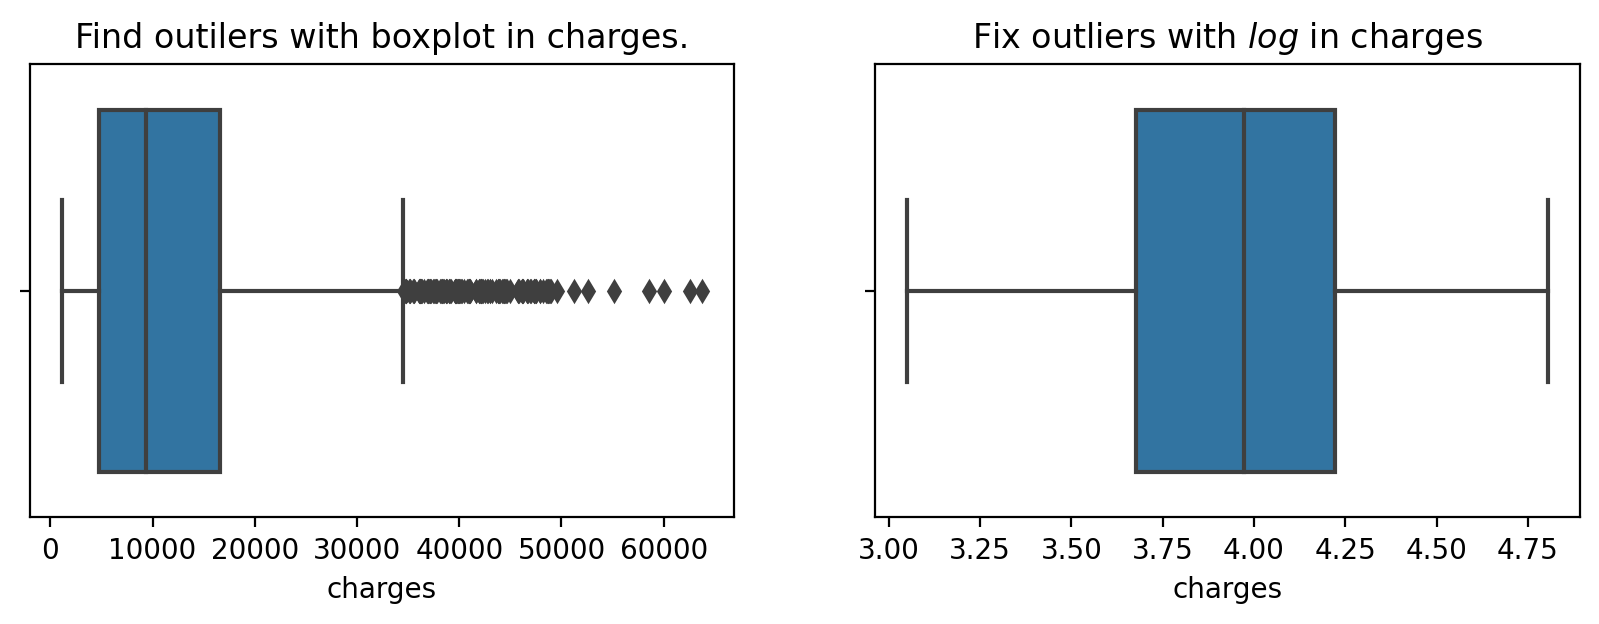

In [11]:
plt.figure(figsize= (10,3),dpi = 200)
plt.subplot(121)
sns.boxplot(data = df, x = df['charges'])
plt.title('Find outilers with boxplot in charges.')

plt.subplot(122)
sns.boxplot(data = df, x = np.log10(df['charges']))
plt.title('Fix outliers with $log$ in charges')
plt.show()

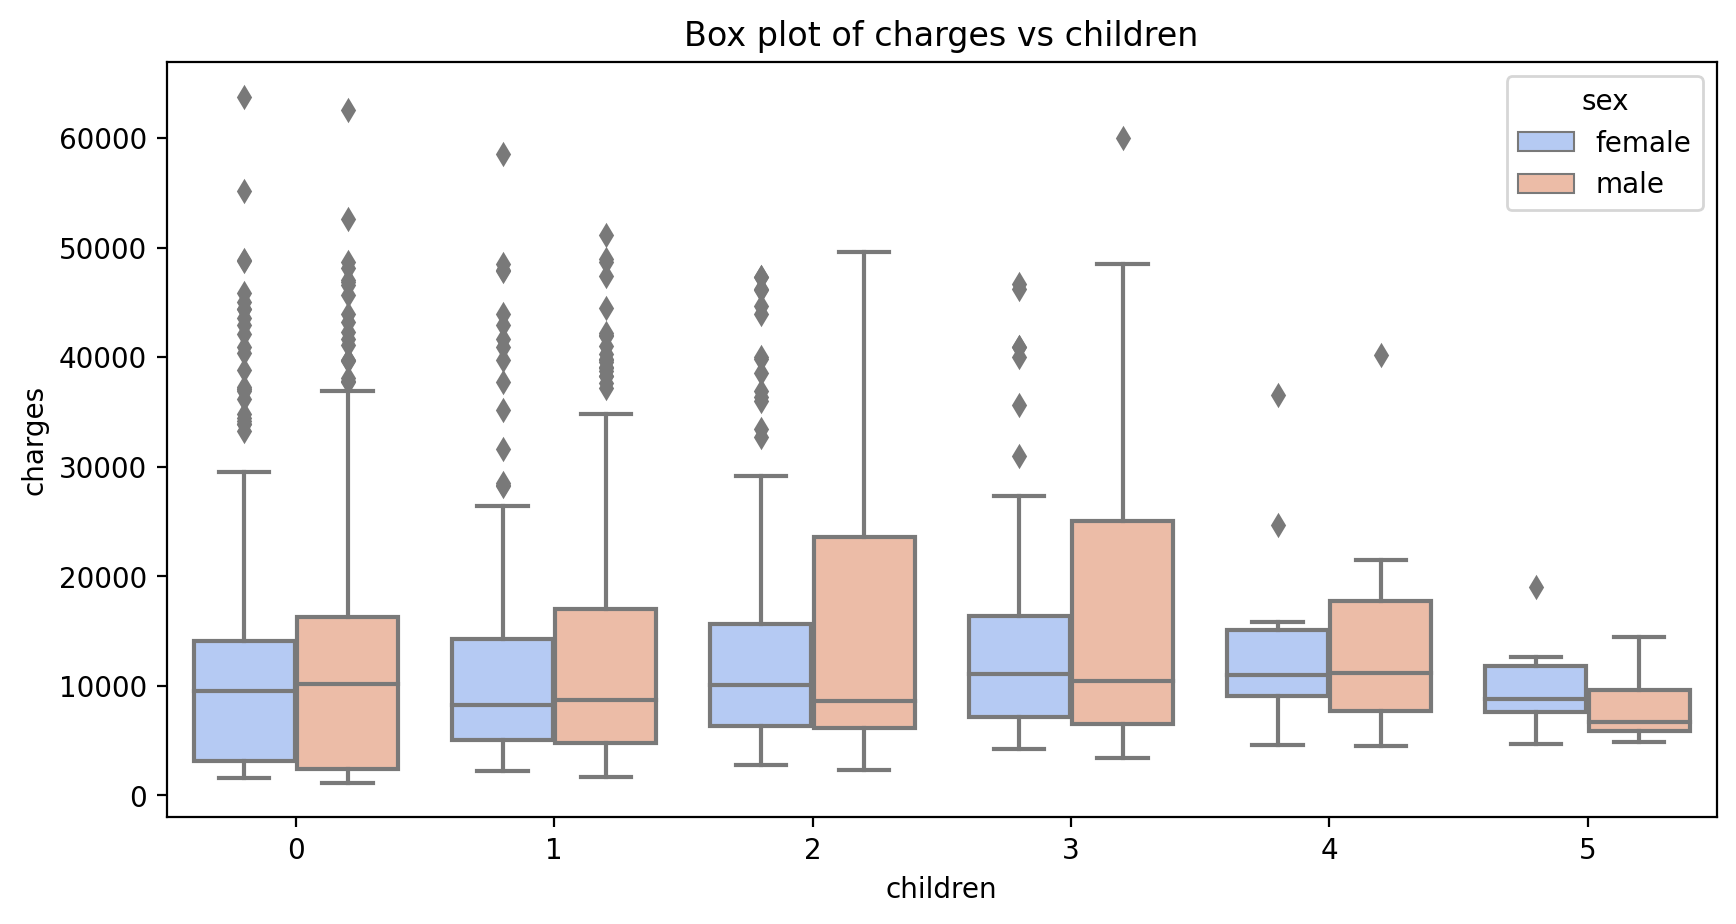

In [12]:
plt.figure(figsize = (10,5), dpi = 200)
sns.boxplot(data = df, x = 'children', y = 'charges', hue = 'sex', palette = 'coolwarm')
plt.title('Box plot of charges vs children')
plt.show()

In [13]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


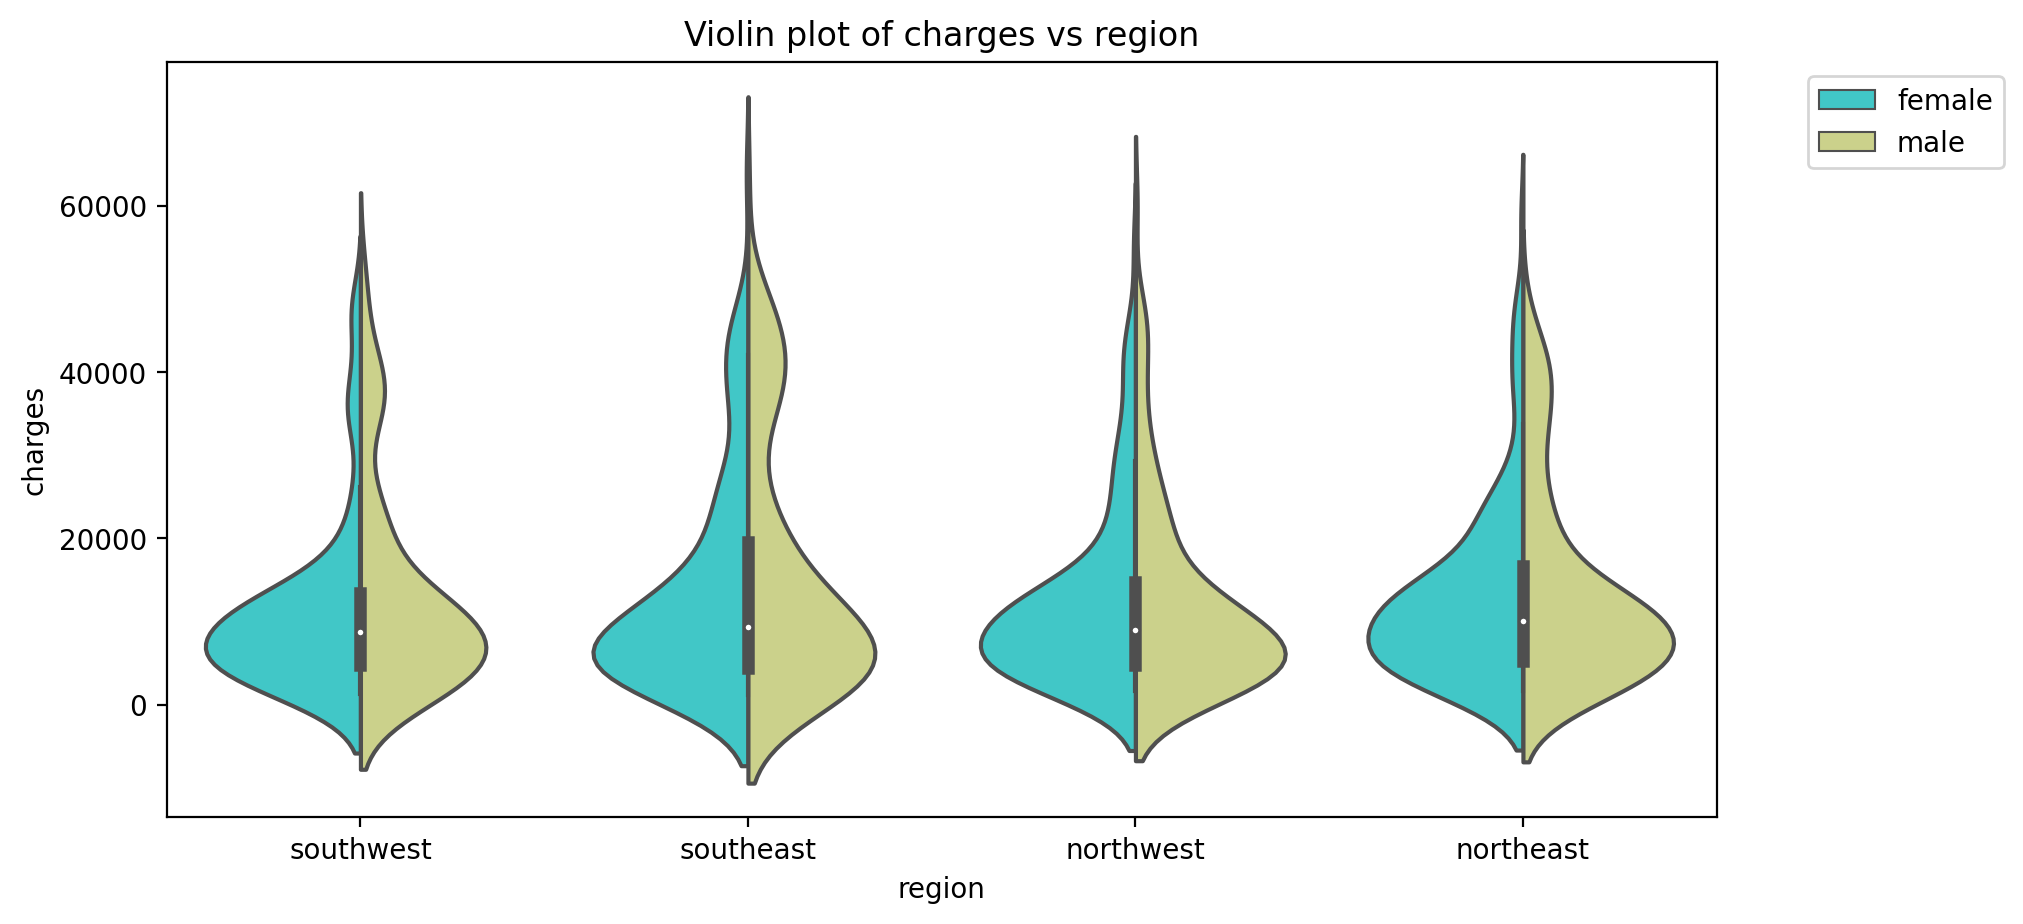

In [14]:
plt.figure(figsize = (10,5), dpi = 200)
sns.violinplot(data = df, x = 'region', y = 'charges', hue = 'sex', palette = 'rainbow',split = True)
plt.title('Violin plot of charges vs region')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')
plt.show()

## How do smoking people differ from others?

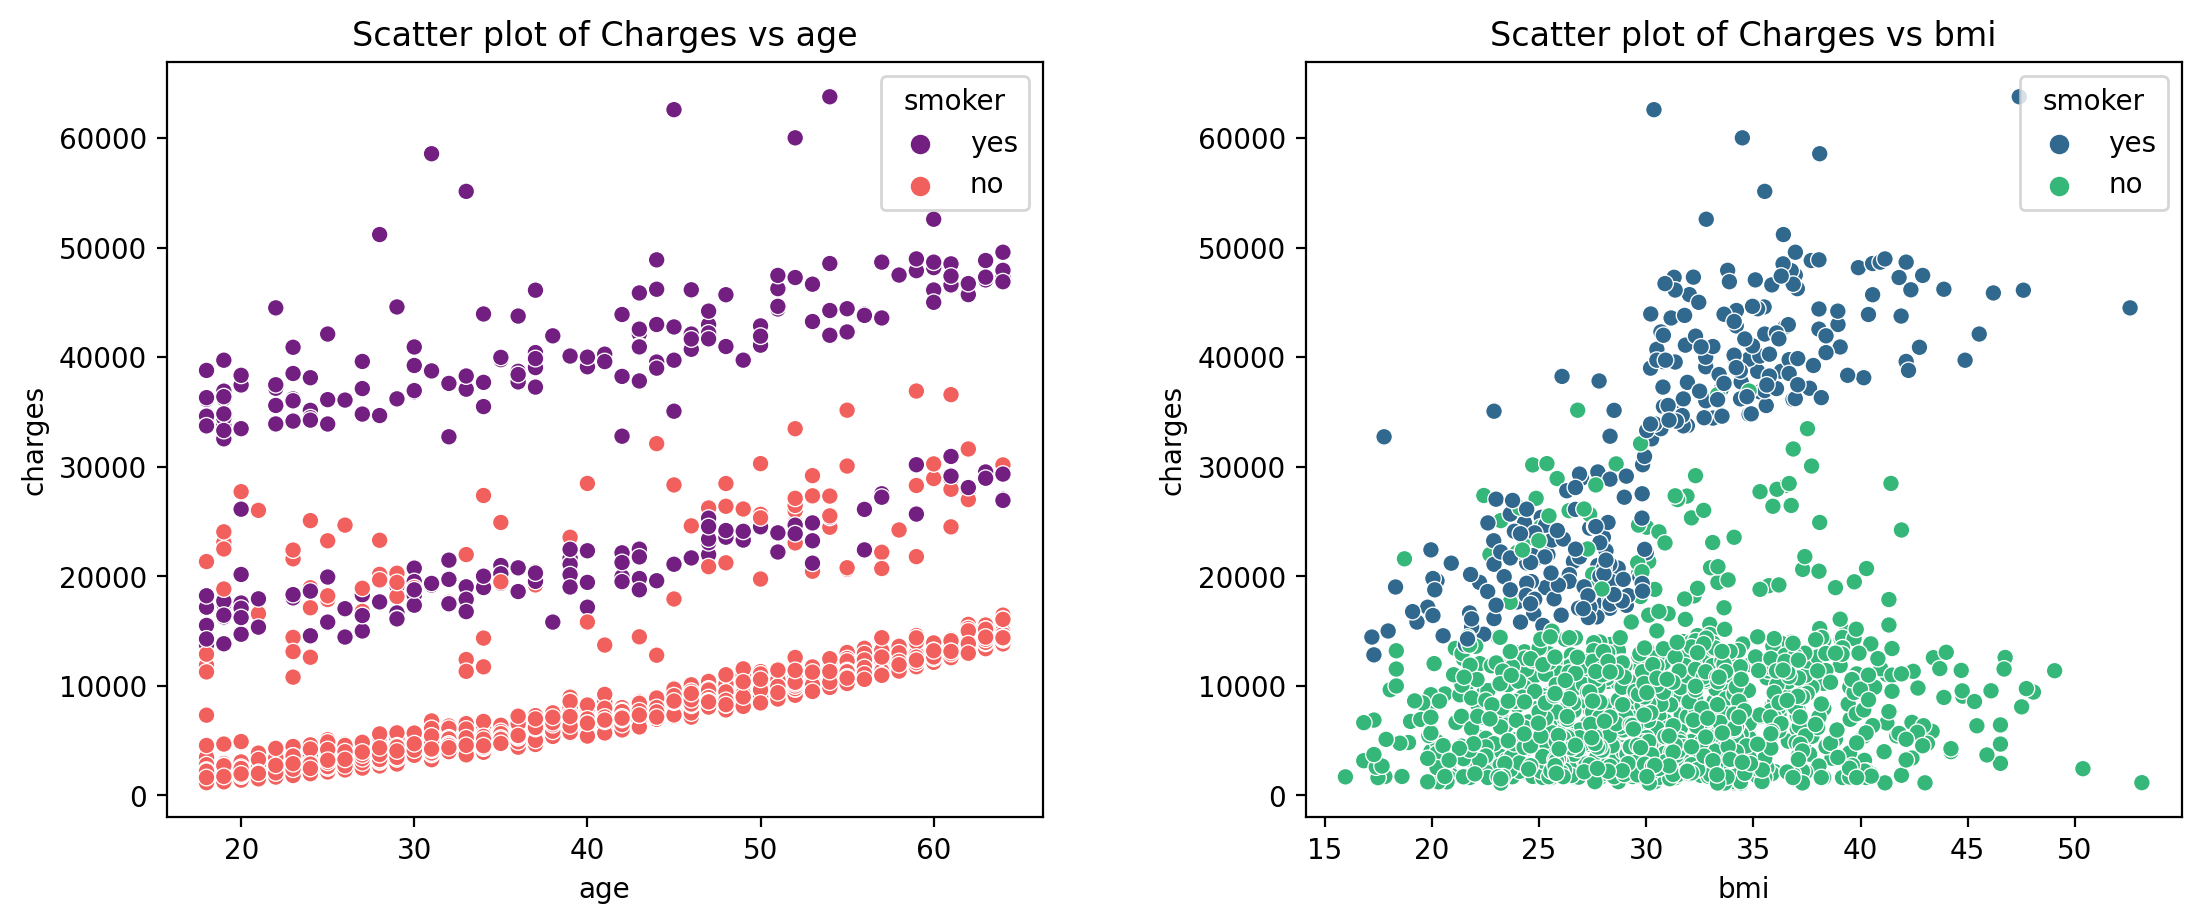

In [15]:
f = plt.figure(figsize = (13,5),dpi = 200)

ax = f.add_subplot(121)
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'smoker', palette = 'magma', ax = ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'smoker', palette = 'viridis',ax = ax)
ax.set_title('Scatter plot of Charges vs bmi')
plt.subplots_adjust(wspace=0.3)
plt.show()

## Label encoding is used to convert categorical data into numerical format, specifically integers. 

In [16]:
categorical_data = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_data:
    print(col)
    print('*'*5)
    print(df[col].value_counts())
    print('*'*30)

sex
*****
male      676
female    662
Name: sex, dtype: int64
******************************
smoker
*****
no     1064
yes     274
Name: smoker, dtype: int64
******************************
region
*****
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
******************************


In [17]:
df = pd.get_dummies(data = df, columns = categorical_data,drop_first = True )

In [18]:
df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Building Linear Regression model

In [19]:
X = df.drop('charges',axis = 1)
y = np.log10(df['charges'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
pred = lin_reg.predict(X_test)

In [23]:
pred_values = {'Actual Values':y_test,
               'Predicted Values': pred}
pred_df = pd.DataFrame(pred_values)
pred_df.reset_index(drop = True)

,Actual Values,Predicted Values
0,3.958806,3.959148
1,3.721990,3.743743
2,4.467327,4.818301
3,3.968571,3.961606
4,4.528278,4.138061
...,...,...
330,4.121136,4.115901
331,4.077171,4.095956
332,4.157105,3.711968
333,4.512529,4.091865


## In linear regression modeling, both Mean Squared Error (MSE) and R-squared (R²) are important metrics used to evaluate the performance and goodness of fit of the model.

In [24]:
mse = mean_squared_error(pred, y_test)
R = lin_reg.score(X_test, y_test)

In [28]:
print('Mean square error: ',mse**10)
print('R square error: ',R)

Mean square error:  3.798550136954795e-15
R square error:  0.7782429592887117


## The Variance Inflation Factor (VIF) is a statistical measure used to assess the severity of multicollinearity in a multiple linear regression model. High multicollinearity can cause problems in the model, leading to unstable estimates of regression coefficients and reduced interpretability.

## Interpreting VIF values:

## VIF = 1: No multicollinearity
    
## VIF > 1 and < 5: Moderate multicollinearity

## VIF >= 5: High multicollinearity. 

In [26]:
VIF = 1/(1 - R)

print('Variance Inflation Factor: ',VIF)

Variance Inflation Factor:  4.5094396858493795
